In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import re
from twython import Twython
from PIL import Image
from wordcloud import WordCloud, STOPWORDS
from IPython.display import Image as im

In [2]:
ccdata = pd.read_csv('./senti_results/Tweet_Senti.csv', error_bad_lines=False)
tweets=ccdata[['Date','Tweet']].copy()
tweets

Date                                              Tweet
0    20090612   [@CNETNews]EUは、 Microsoftのブラウザに移動反応 http://ti...
1    20090613   Intuit Did Not Kill MS Money. Microsoft Did. ...
2    20090614   DRINGEND: VAST contract - Leuke Microsoft .Ne...
3    20090615   XBOX CONSOLE FOR SALE - Microsoft xbox 360 sy...
4    20090616   The comic Little Gamers on Microsoft's Natal:...
5    20090617   Vendo xbox 360 mas info aki... RT @chrispiril...
6    20090618   Microsoft makes gains with Bing, clashes with...
7    20090619   Microsoft's free anti-malware beta to arrive ...
8    20090620   Microsoft to revamp MSN, include stronger Bin...
9    20090621   if any one has xbox live message me with your...
10   20090622   Microsoft Dynamics GP and Illegal Characters ...
11   20090623   What is the state of IT? Find out tomorrow wi...
12   20090624   just started playing Call of Duty 4: Modern W...
13   20090625   XBOX CONSOLE FOR SALE - Microsoft xbox 360 el...
14   20090626   Microsoft avoids Apple's recession pricing wi...
15   20090627   Movie Posters -> Scott Mendelson: 20 years la...
16   20090628   XBOX CONSOLE FOR SALE - Microsoft xbox 360 - ...
17   20090629   Microsoft charges Europeans double for Window...
18   20090630   The MSTeam (not Microsoft) is building an iph...
19   20090703   RT @Bob_do: Microsoft Changing Users' Default...
20   20090704   RT @arturogoga La publicidad de Microsoft, ca...
21   20090705   Get Rich on Microsoft Search engine Bing http...
22   20090706   Slashdot Submission | Chris Rock Joke Morphin...
23   20090707   Ready to start tracking your home energy use?...
24   20090708   Checking out - Microsoft Professional Photogr...
25   20090709   RT @msPartner: RT @cvedulla: Seven Things Par...
26   20090710   Internet Marketing Spain: Google Chrome OS: P...
27   20090711   Microsoft hopes users see the (Silver) light:...
28   20090712   StartupNews: Google's Microsoft Moment http:/...
29   20090713   RT @scsintl: Estar por venir 6 Boletines de s...
..        ...                                                ...
164  20091130   why is it that this linux guy is looking with...
165  20091201   @KnucklesDawson great game thought i been fol...
166  20091202   My intros lol http://tinyurl.com/yd94yhf #the...
167  20091203   New xbox remote is purchased... I wish they w...
168  20091204   Check Out Mad Money and News on MSFT: Based o...
169  20091205   New blog post: Band <b>Hero</b> - Xbox 360 re...
170  20091206   I cant even use it anymore. So frustrating. R...
171  20091207   Akimbo Models http://tinyurl.com/yh5b3q3 #the...
172  20091208   Joy Ride Release: Microsoft are still keeping...
173  20091209   Call of Duty: Modern Warfare 2 Review http://...
174  20091210   [CNET News] Microsoft reposts Windows 7 downl...
175  20091211   Microsoft may speed up to $150M in Yahoo paym...
176  20091212   @HMXThrasher do you kill zombies on pc or xbo...
177  20091213   Microsoft lanza un juego que ayuda al usuario...
178  20091214   ugh! xbox and wii??? wtf y not $$$ so u can g...
179  20091215   okay, this is so geektastic, but I need to na...
180  20091216   Microsoft Weekly Update (Dec 15-Dec 21) http:...
181  20091217   @jasonsalas Haha! I excel in my mediocrity. (...
182  20091218   RT @engadget: Microsoft updating Zune HD Twit...
183  20091219   @jinkwell @kittytina I love the xbox 360! :) ...
184  20091220   Just got the games \Left 4 Dead\" and \"DJ He...
185  20091221   Unlocked 'Ding! Hardcore' in 'Borderlands™' h...
186  20091222   RT @fanultra: \Twitter mete la mano en la car...
187  20091224   just got home from playing ball. shower and x...
188  20091225   would HankKillstricklandPROPAIN be too long f...
189  20091227   Microsoft is and Microsoft does http://phpc.i...
190  20091228   @josecarloz no es que esté mal, pero hubiese ...
191  20091229   What do you think of Microsoft's answer to Go...
192  20091230   Microsoft, Yahoo help keep India away from **...
193  20091231   Microsoft and Kia formalize 

## data cleaning

In [3]:
raw_tweets = tweets['Tweet'].copy()
raw_tweets[1]

' Intuit Did Not Kill MS Money. Microsoft Did. Slowly, Over Long Years. Here’s the Full Saga. [via feedly]: An era.. http://tinyurl.com/m6fzun Um, new Microsoft Google bashing search enging - bing.com http://is.gd/S22K @Microsoft_Xbox magic the gathering xbla is coming out next week too for 800 points.. Just got in from a night stage on Microsoft Challenger. 2 hour run in middle of night. Legs now feel like logs. Fun tho! #healthcare Microsoft HealthVault Continues to Enlarge Its Footprint: Nearly a year and a half after .. http://tinyurl.com/mcaoa4 SnowLeopard por US$29 é um chute nas costelas da Microsoft. Quanto é que vai custar mesmo o Windows7? http://migre.me/26hw Bing modified to enable porn filtering: After a lot of criticism, Microsoft has made changes to its new Bing sea.. http://tinyurl.com/nxtant A Microsoft employee has set up a \'blind\' search engine tester...which is best? Google, Bing (Ms) or Yahoo: http://blindsearch.fejus.com/ Bing modified to enable porn filtering: 

In [4]:
#Create a string form of our list of text
raw_string = ''.join(raw_tweets[167:193])
no_links = re.sub(r'http\S+', '', raw_string)
no_unicode = re.sub(r"\\[a-z][a-z]?[0-9]+", '', no_links)
no_special_characters = re.sub('[^A-Za-z ]+', '', no_unicode)
no_special_characters

' New xbox remote is purchased I wish they would temper tantrum proof these buggers this is at least my third one this year RT kikilo RT osrin Microsoft and Google faceoff on Healthcare  RT omnitechnews Microsoft Office  shipping in June   Microsofts Bing Tries to Leapfrog Google Maps PC World  Just came from radio shack and they didnt have any xbox  controllers smh Got PlayOn to work through my xbox which is pretty cool but how come I cant find Daily Show on hulu through it Anyone else use the ap Microsoft USB Wired Optical Mouse  Free Shipping at Newegg Newegg Coupons Votes  protoncharging gbfans rent Ghostbusters for the Microsoft Zune only  Cents Pic Of the Day Microsofts Steve Ballmer Rendered In Windows Blue Screens Remember that famous mosaic portr  RT bytebot RT ditesh RT thestartech Yasmin Mahmood leaves Microsoft Malaysia  swerveonkiss xbox if you dont have stuff to do in the morning early night  me RT olhardigital Microsoft nega problema da tela preta da morte   RT conectica

In [5]:
words = no_special_characters.split(" ")
words = [w for w in words if len(w) > 2]  # ignore a, an, be, ...
words = [w.lower() for w in words]
words = [w for w in words if w not in STOPWORDS]
words

['new',
 'xbox',
 'remote',
 'purchased',
 'wish',
 'temper',
 'tantrum',
 'proof',
 'buggers',
 'least',
 'third',
 'one',
 'year',
 'kikilo',
 'osrin',
 'microsoft',
 'google',
 'faceoff',
 'healthcare',
 'omnitechnews',
 'microsoft',
 'office',
 'shipping',
 'june',
 'microsofts',
 'bing',
 'tries',
 'leapfrog',
 'google',
 'maps',
 'world',
 'came',
 'radio',
 'shack',
 'didnt',
 'xbox',
 'controllers',
 'smh',
 'got',
 'playon',
 'work',
 'xbox',
 'pretty',
 'cool',
 'come',
 'cant',
 'find',
 'daily',
 'show',
 'hulu',
 'anyone',
 'use',
 'microsoft',
 'usb',
 'wired',
 'optical',
 'mouse',
 'free',
 'shipping',
 'newegg',
 'newegg',
 'coupons',
 'votes',
 'protoncharging',
 'gbfans',
 'rent',
 'ghostbusters',
 'microsoft',
 'zune',
 'cents',
 'pic',
 'day',
 'microsofts',
 'steve',
 'ballmer',
 'rendered',
 'windows',
 'blue',
 'screens',
 'remember',
 'famous',
 'mosaic',
 'portr',
 'bytebot',
 'ditesh',
 'thestartech',
 'yasmin',
 'mahmood',
 'leaves',
 'microsoft',
 'malaysia

In [6]:
mask = np.array(Image.open('windows2.jpg'))

In [7]:
wc = WordCloud(background_color="white", max_words=1000,mask=mask)
clean_string = ','.join(words)
res = wc.generate(clean_string)

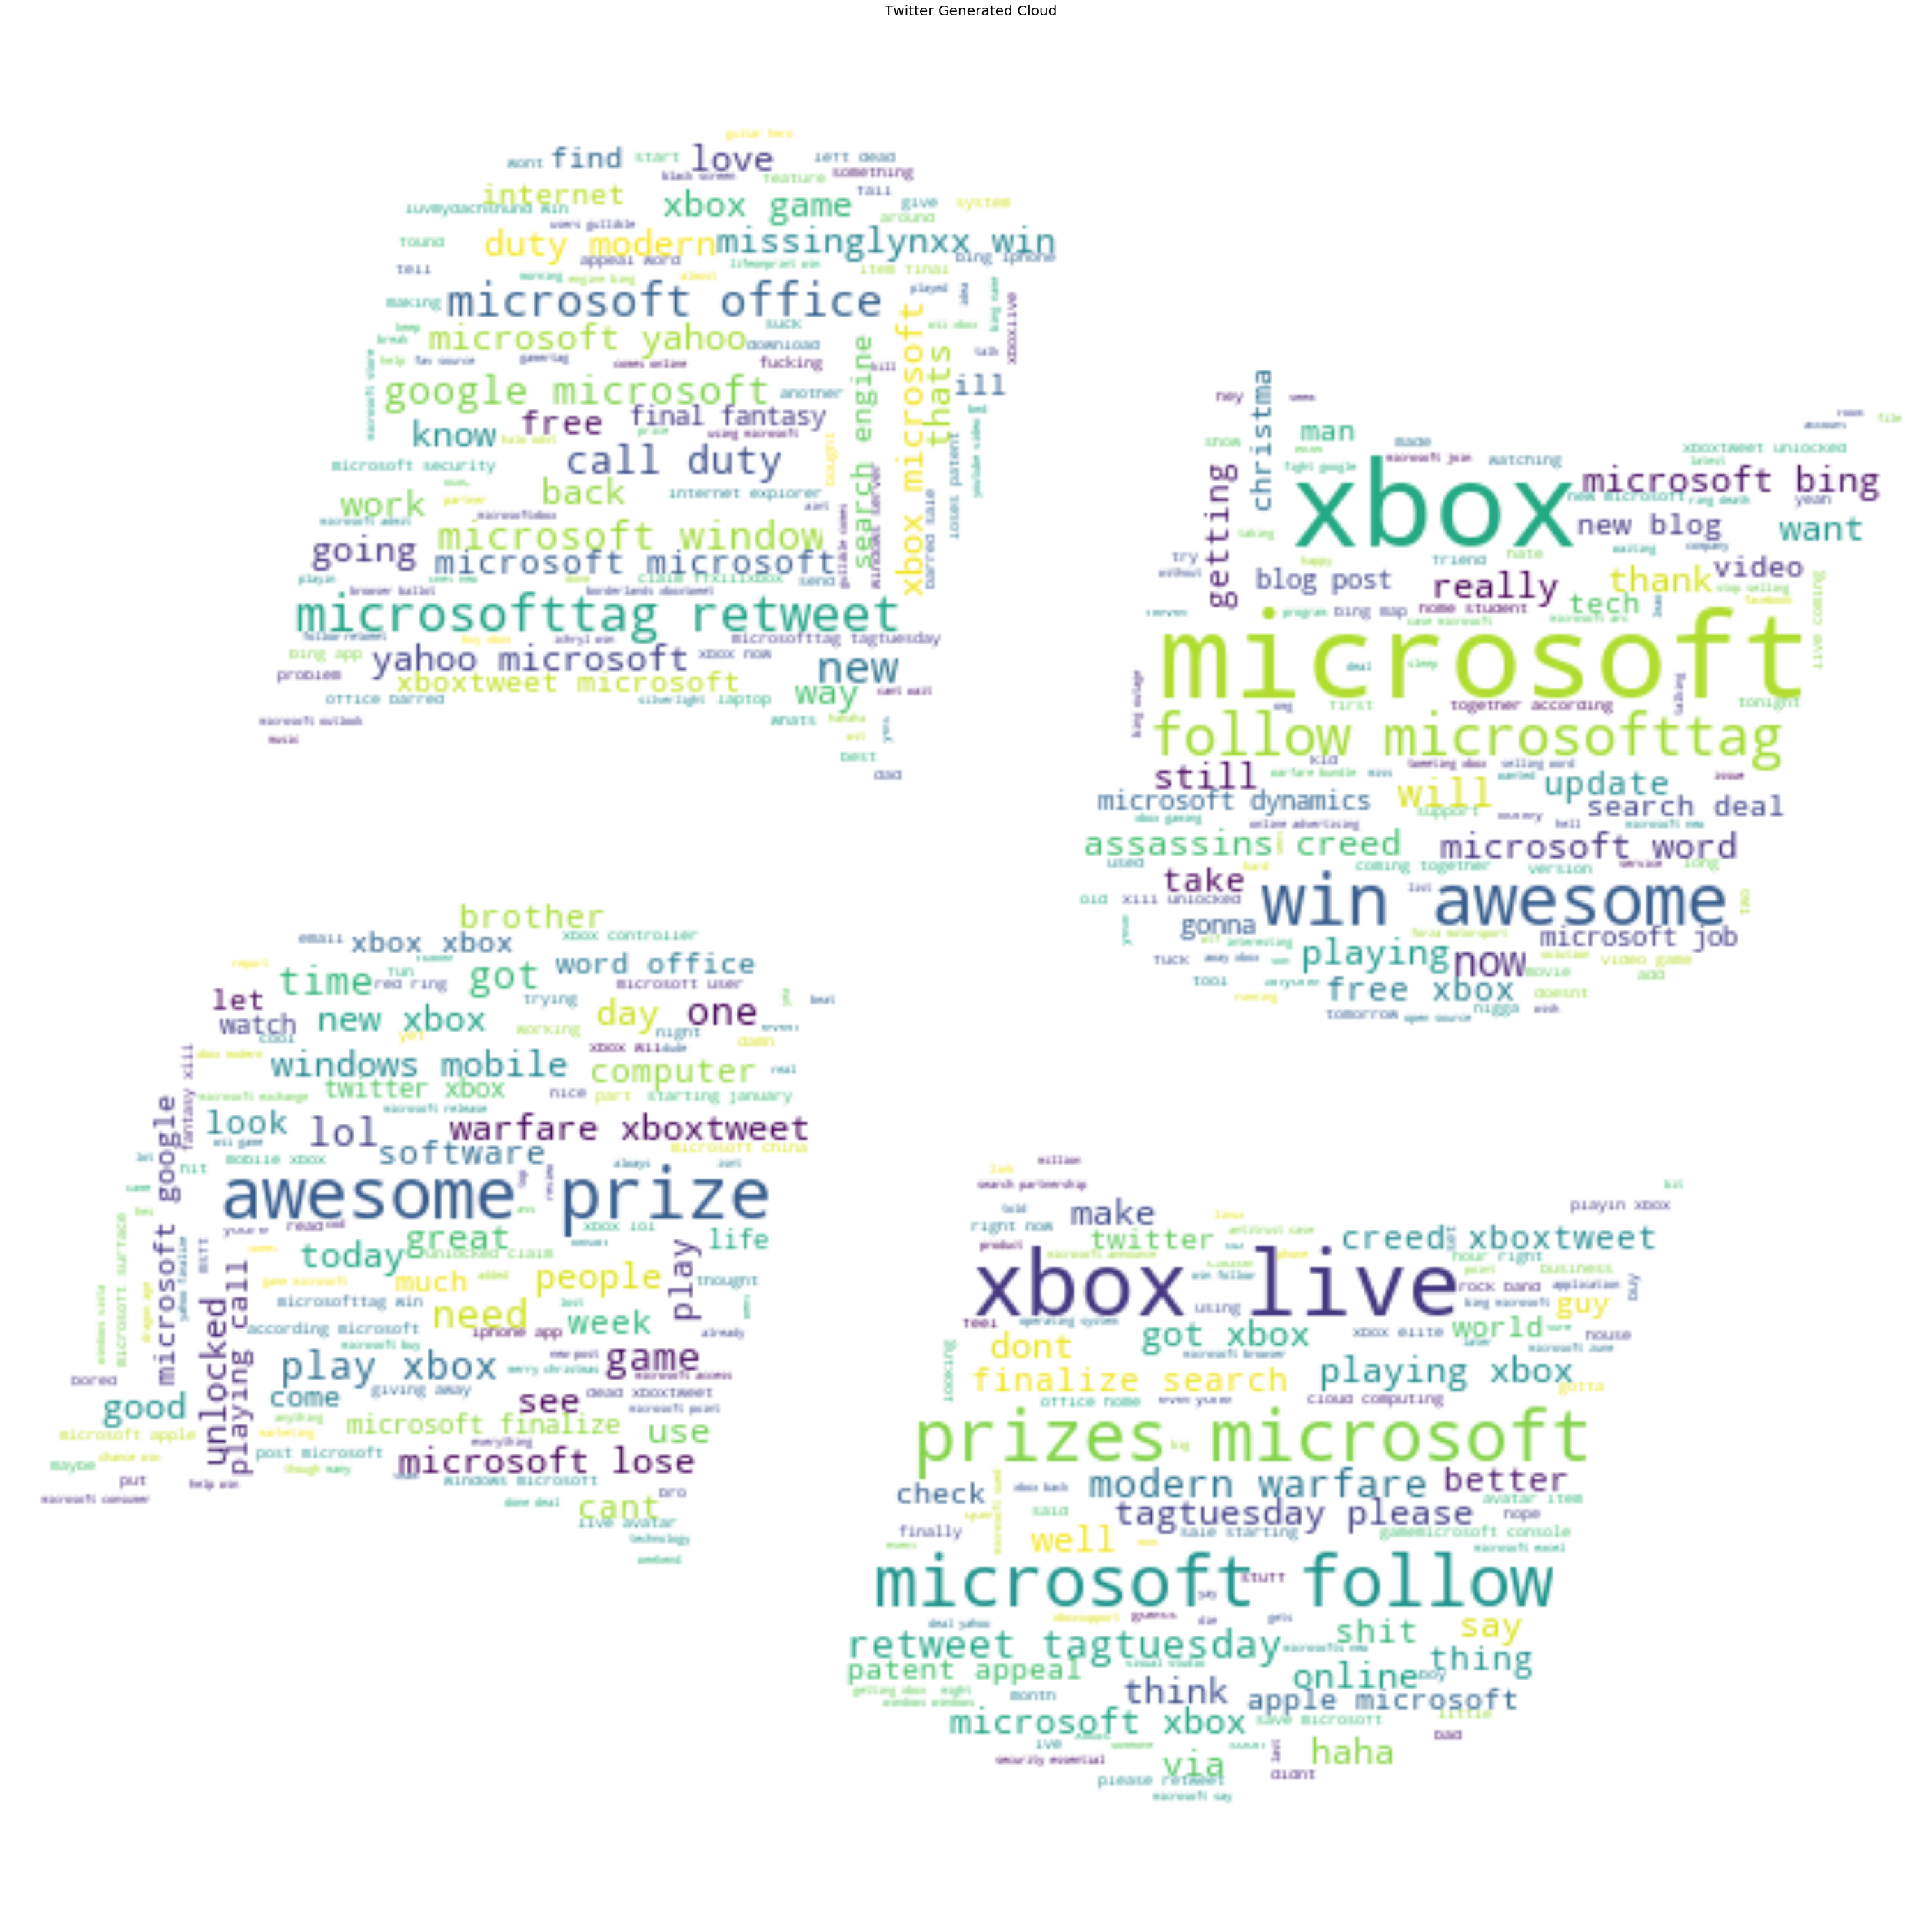

In [8]:
# f = plt.figure(figsize=(50,50))
# f.add_subplot(1,2, 1)
# plt.imshow(mask, cmap=plt.cm.gray, interpolation='bilinear')
# plt.title('Original Stencil', size=40)
# plt.axis("off")
# f.add_subplot(1,2, 2)
plt.figure(figsize=(50,50))
plt.imshow(res, interpolation='bilinear') 
plt.title('Twitter Generated Cloud', size=20)
plt.axis("off")
plt.savefig('tweetcloud.png', dpi=300)
plt.show()